In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, centers=3, n_features=2,
cluster_std=0.2, random_state=0)

from sklearn import datasets
import pandas as pd
import numpy as np
#Load dataset
iris = datasets.load_iris()

from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test,target_train,target_test= train_test_split(iris.data,
iris.target, test_size = 0.20, random_state = 63)

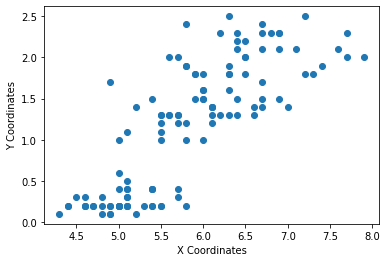

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data_train[:, 0], data_train[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=63).fit(data_train)

In [ ]:
#get the cluster centroids
kmeans.cluster_centers_

array([[5.8826087 , 2.76304348, 4.43043478, 1.45869565],
       [5.02045455, 3.43181818, 1.45681818, 0.25      ],
       [6.84666667, 3.08666667, 5.67      , 2.05      ]])

In [ ]:

# Get the cluster labels
kmeans.labels_

array([1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 0, 2, 2, 1], dtype=int32)

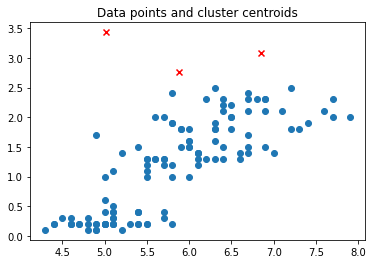

In [ ]:
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(data_train, kmeans.labels_))

0.562685526354519


In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS

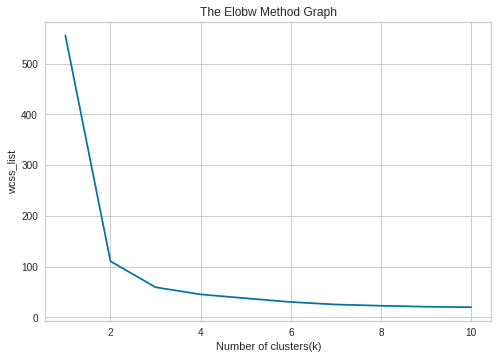

In [ ]:
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 63)  
    kmeans.fit(data_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel
plt.ylabel('wcss_list')  
plt.show() 


In [ ]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=63).fit(data_train)

In [ ]:
kmeans.labels_

array([1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 0, 2, 2, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[5.8826087 , 2.76304348, 4.43043478, 1.45869565],
       [5.02045455, 3.43181818, 1.45681818, 0.25      ],
       [6.84666667, 3.08666667, 5.67      , 2.05      ]])

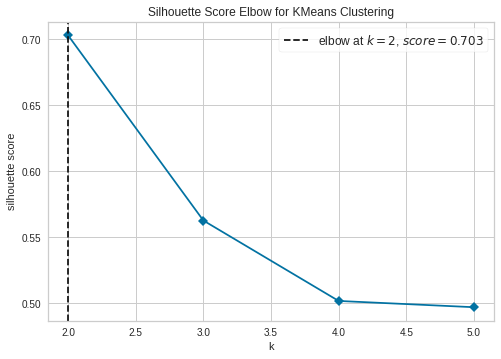

In [ ]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=132)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(data_train)
visualizer.poof()

In [ ]:
target_test.reshape(1,-1)
y_predict= kmeans.fit_predict(data_test) 
print(y_predict)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


ValueError: ignored

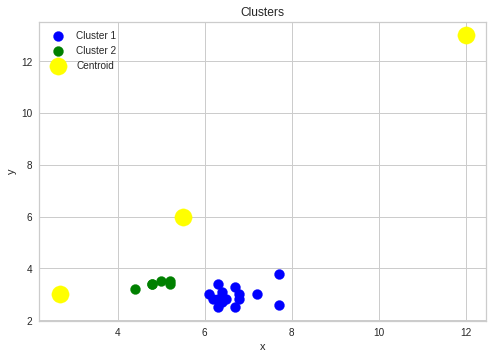

In [ ]:
plt.scatter(data_test[y_predict == 0, 0], data_test[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(data_test[y_predict == 1, 0], data_test[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([1], dtype=int32)

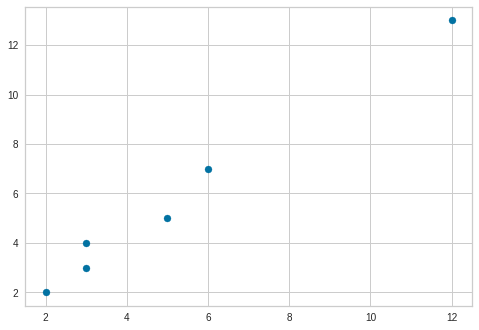

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits()
(1797,64)

(1797, 64)

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
(10,64)

(10, 64)

NameError: ignored

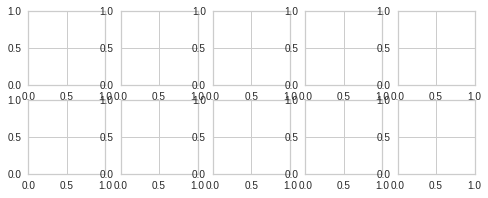

In [ ]:
fig,ax = plt.subplots(2,5,figsize= (8,3))

centers = k_means.cluster_centers_.reshape(10,8,8)

for axi,center in zip(ax.flat,centers): 

  axi.set(xticks = [],yticks = [])
  axi.imshow(center,interpolation = 'nearest',cmap = plt.cm.binary)

In [ ]:
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
mask = (clusters == i)
#if a specific digit belongs to/equivalent a specific cluster then its True␣
,→else False
print(mask)
labels[mask] = mode(digits.target[mask])[0]

IndentationError: ignored